In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
#If the as_frame parameter is true then the X and y variables will be presented in a pandas dataframe. 
#If as_frame is false the data will be presented in an array

housing = fetch_california_housing(as_frame=True)
housing = housing.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


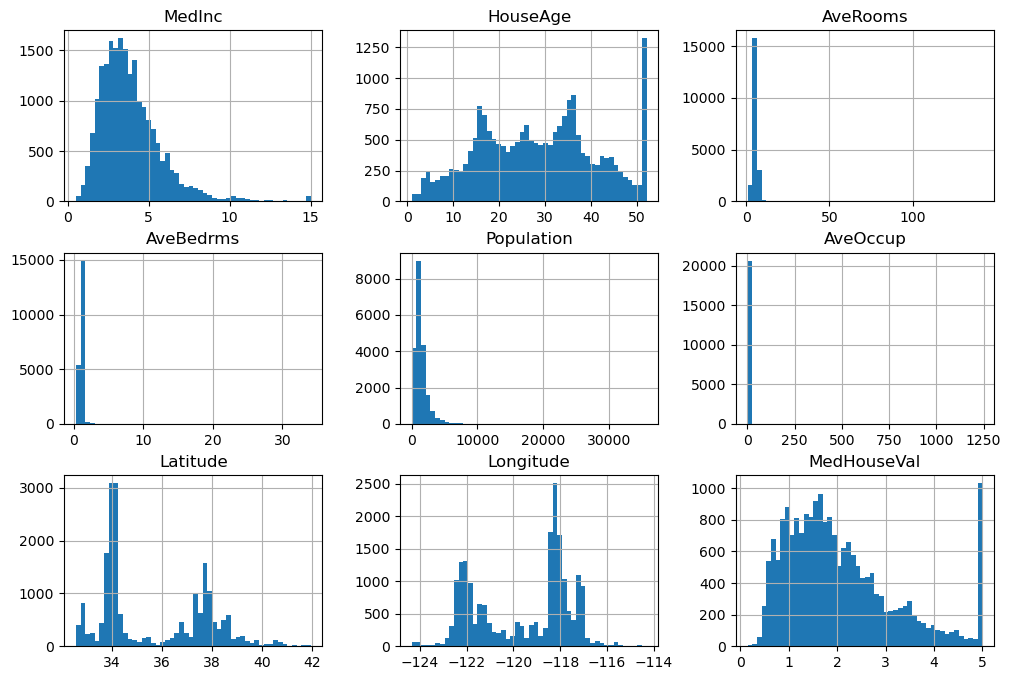

In [10]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

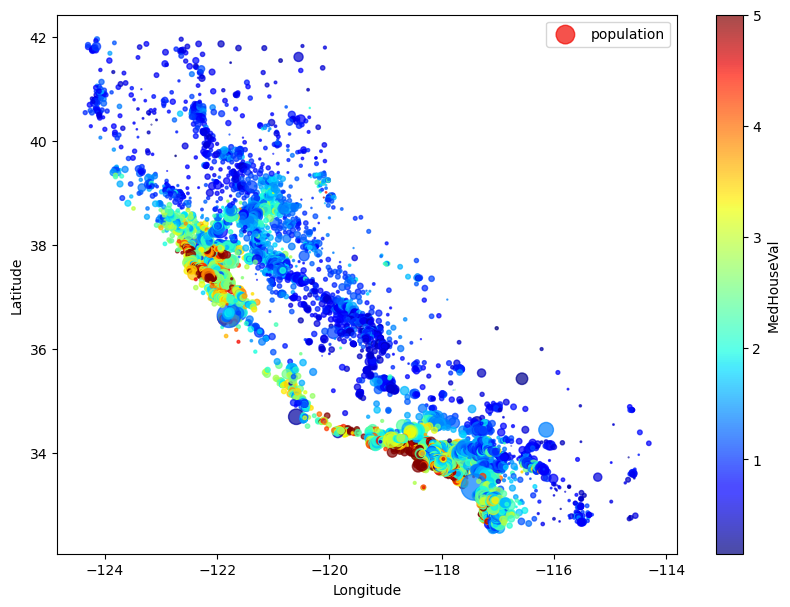

In [3]:
housing.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=housing['Population']/100, label="population", alpha=0.7)
plt.show()

In [12]:
housing.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [31]:
housing.dtypes


MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [33]:
X = housing[["MedInc"]]
y = housing["MedHouseVal"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
lr = LinearRegression()

In [43]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(X_test)

C:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [23]:
r2_score( y_test, y_pred)

0.45885918903846656

In [45]:
print(lr.intercept_)

0.4445972916907872


In [51]:
#checking the prediction
lr.predict(X[0:1])

C:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.93567412])

In [61]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [65]:
#some bonus points.
#model persistance (saving and loading trained models)
import pickle

In [67]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [79]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)
    

In [71]:
X[0:5]

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


In [103]:
clf2.predict(X[0:5])

C:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.93567412, 3.92569387, 3.48790448, 2.81096635, 2.05745701])

In [101]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

        Actual  Predicted
20046  0.47700   1.149589
3024   0.45800   1.506069
15663  5.00001   1.903937
20484  2.18600   2.850594
9814   2.78000   2.006633


<Axes: >

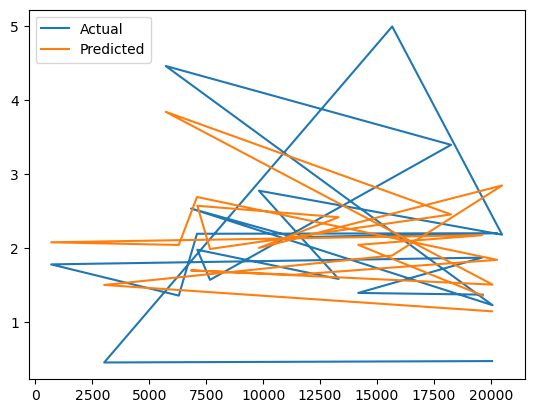

In [113]:
predictions.head(20).plot()